In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import dill as pickle

from nn_model import *

#this may take a time
import tensorflow as tf
import keras

sys.version

'3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
train_labels=np.array(list(map(fromnum,train_labels)))

In [6]:
clothes_part_train=train_images[:30000]
clothes_part_label=train_labels[:30000]
clothes_part_train=clothes_part_train.reshape((30000,784))
clothes_part_label=clothes_part_label.reshape((30000,10))
train_images_flatten = train_images.reshape((60000,784))
train_labels_flatten = train_labels.reshape((60000,10))

True label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


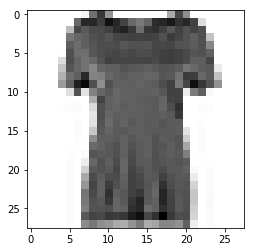

In [7]:
ind=10
label=train_labels[ind]
print('True label: ',label)
plt.imshow(train_images[ind], cmap=plt.cm.gray_r, interpolation='nearest')

In [8]:
net = NetModel([100,10],activations={1:ReLu,2:sigmoid},input_layer=784,seed=4)
st=time()
np.random.seed(3)
net.fit(clothes_part_train,clothes_part_label,method='SGD',batch_size=16, iterations=50000,lr=0.1,printq=1, lambd = 0)
print(time()-st)

Cost after iteration 0: 580.493210
Cost after iteration 1: 407.587616
KeyboardInTerrupt
10.902878522872925


True label:  Shirt
Predicted:  T-shirt/top


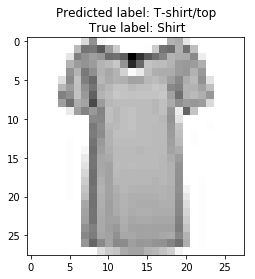

In [10]:
imnum = 1943
x=test_images[imnum]
label=test_labels[imnum]
print('True label: ',class_names[label])
print('Predicted: ',class_names[np.argmax(f_predict(x.reshape(1,784),net.parameters,printq=False))])
plt.title('Predicted label: {}\n True label: {}'.format(class_names[np.argmax(f_predict(x.reshape(1,784),net.parameters,printq= False))],class_names[label]))
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

#label=mnist_part_test_label[imnum]
#plt.title('Predicted label: {}\n True label: {}'.format(np.argmax(net1.predict(np.array([x]),printq= False)),np.argmax(label)))
#plt.imshow(norm1, cmap=plt.cm.gray_r, interpolation='nearest')

In [14]:
with open('data\CLOTHES_net_v1.pickle', 'rb') as f:
    tr_copy=pickle.load(f)

True label:  Pullover
Predicted:  Pullover


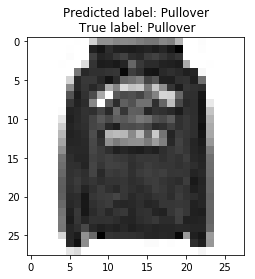

In [13]:
imnum = 1941
x=test_images[imnum]
label=test_labels[imnum]
print('True label: ',class_names[label])
print('Predicted: ',class_names[np.argmax(f_predict(x.reshape(1,784),tr_copy,printq=False))])
plt.title('Predicted label: {}\n True label: {}'.format(class_names[np.argmax(f_predict(x.reshape(1,784),tr_copy,printq= False))],class_names[label]))
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

#label=mnist_part_test_label[imnum]
#plt.title('Predicted label: {}\n True label: {}'.format(np.argmax(net1.predict(np.array([x]),printq= False)),np.argmax(label)))
#plt.imshow(norm1, cmap=plt.cm.gray_r, interpolation='nearest')